# Задание 1
**Преобразовать изображение из RGB в оттенки серого. Реализовать два варианта формулы с учетом разных вкладов R, G и B в интенсивность (см презентацию). Затем найти разность полученных полутоновых изображений. Построить гистограммы интенсивности после одного и второго преобразования.**

Ивашкова

## Импорт библиотек

In [111]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)

## Загрузка изображений

In [112]:
img1 = Image.open("image1/image1.jpg")
img2 = Image.open("image2/image2.jpg")

img1 = img1.convert("RGB")
img2 = img2.convert("RGB")

arr1 = np.array(img1)
arr2 = np.array(img2)

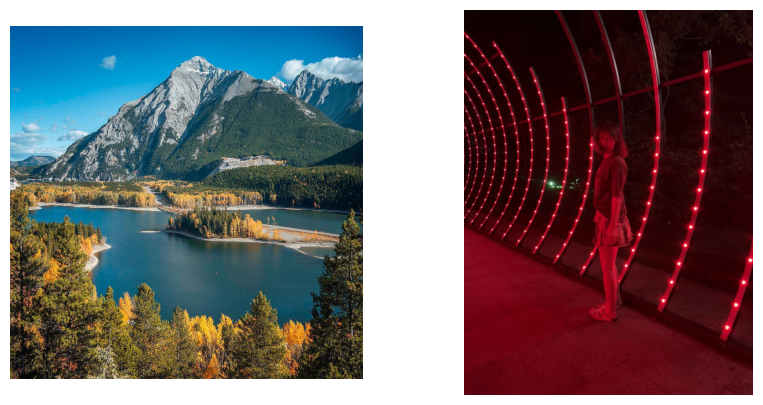

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img1)
axes[0].axis("off")

axes[1].imshow(img2)
axes[1].axis("off")

plt.show()

## Преобразование в оттенки серого

In [114]:
gray1_1 = 0.299 * arr1[:, :, 0] + 0.587 * arr1[:, :, 1] + 0.114 * arr1[:, :, 2]
gray2_1 = 0.2126 * arr1[:, :, 0] + 0.7152 * arr1[:, :, 1] + 0.0722 * arr1[:, :, 2]

gray1_2 = 0.299 * arr2[:, :, 0] + 0.587 * arr2[:, :, 1] + 0.114 * arr2[:, :, 2]
gray2_2 = 0.2126 * arr2[:, :, 0] + 0.7152 * arr2[:, :, 1] + 0.0722 * arr2[:, :, 2]

gray1_1_uint8 = gray1_1.astype(np.uint8)
gray2_1_uint8 = gray2_1.astype(np.uint8)

gray1_2_uint8 = gray1_2.astype(np.uint8)
gray2_2_uint8 = gray2_2.astype(np.uint8)

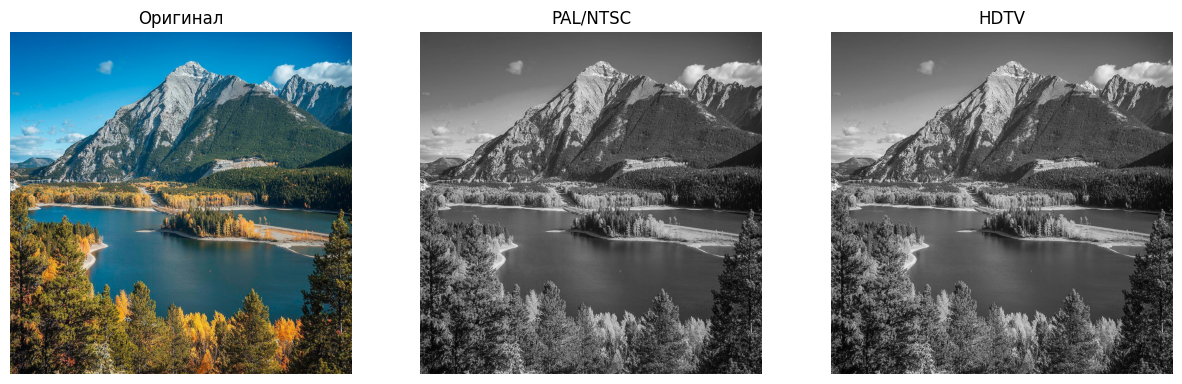

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

axes[0].imshow(img1)
axes[0].set_title("Оригинал")
axes[0].axis("off")

axes[1].imshow(gray1_1_uint8, cmap="gray")
axes[1].set_title("PAL/NTSC")
axes[1].axis("off")

axes[2].imshow(gray2_1_uint8, cmap="gray")
axes[2].set_title("HDTV")
axes[2].axis("off")

plt.show()

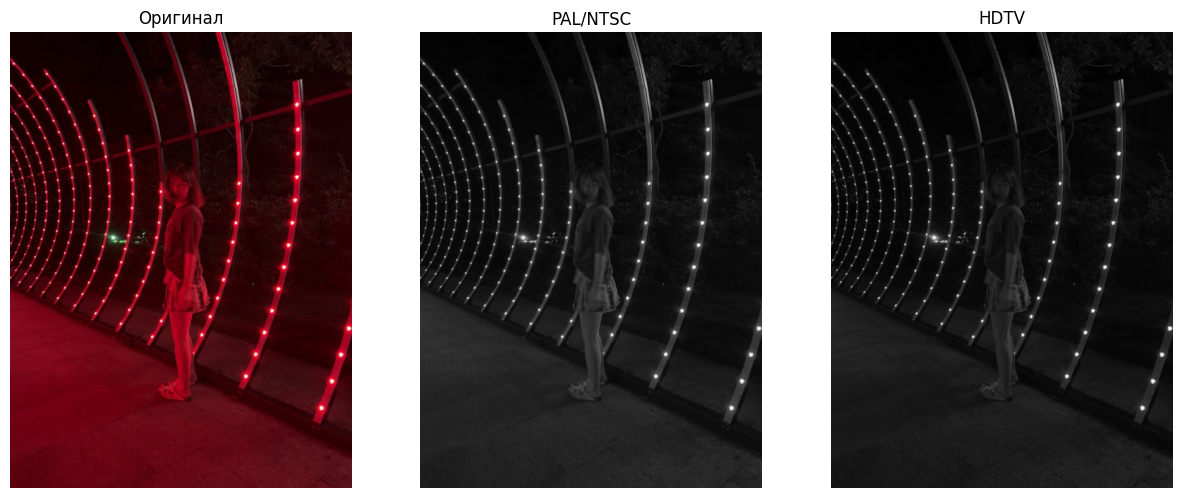

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

axes[0].imshow(img2)
axes[0].set_title("Оригинал")
axes[0].axis("off")

axes[1].imshow(gray1_2_uint8, cmap="gray")
axes[1].set_title("PAL/NTSC")
axes[1].axis("off")

axes[2].imshow(gray2_2_uint8, cmap="gray")
axes[2].set_title("HDTV")
axes[2].axis("off")

plt.show()

## Разность изображений

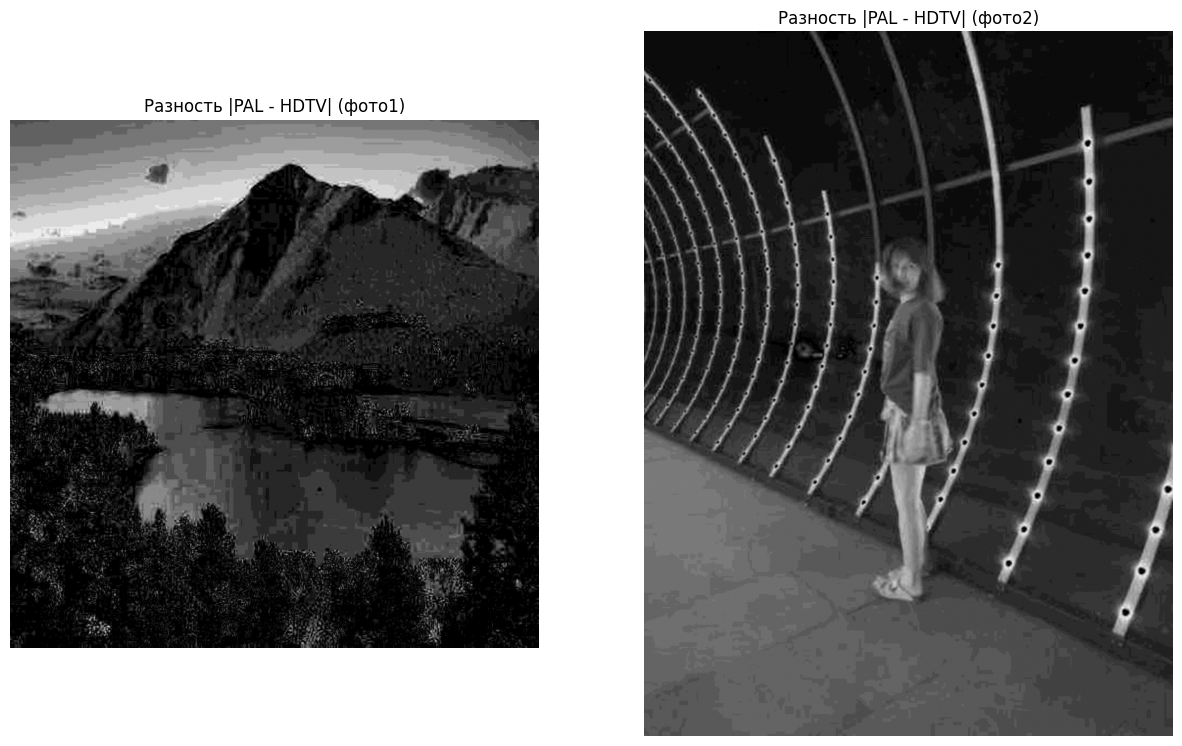

In [117]:
diff1 = np.abs(gray1_1 - gray2_1).astype(np.uint8) 
diff2 = np.abs(gray1_2 - gray2_2).astype(np.uint8) 

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(diff1, cmap="gray")
axes[0].set_title("Разность |PAL - HDTV| (фото1)")
axes[0].axis("off")

axes[1].imshow(diff2, cmap="gray")
axes[1].set_title("Разность |PAL - HDTV| (фото2)")
axes[1].axis("off")

plt.show()

## Гистограммы 

### По отдельности

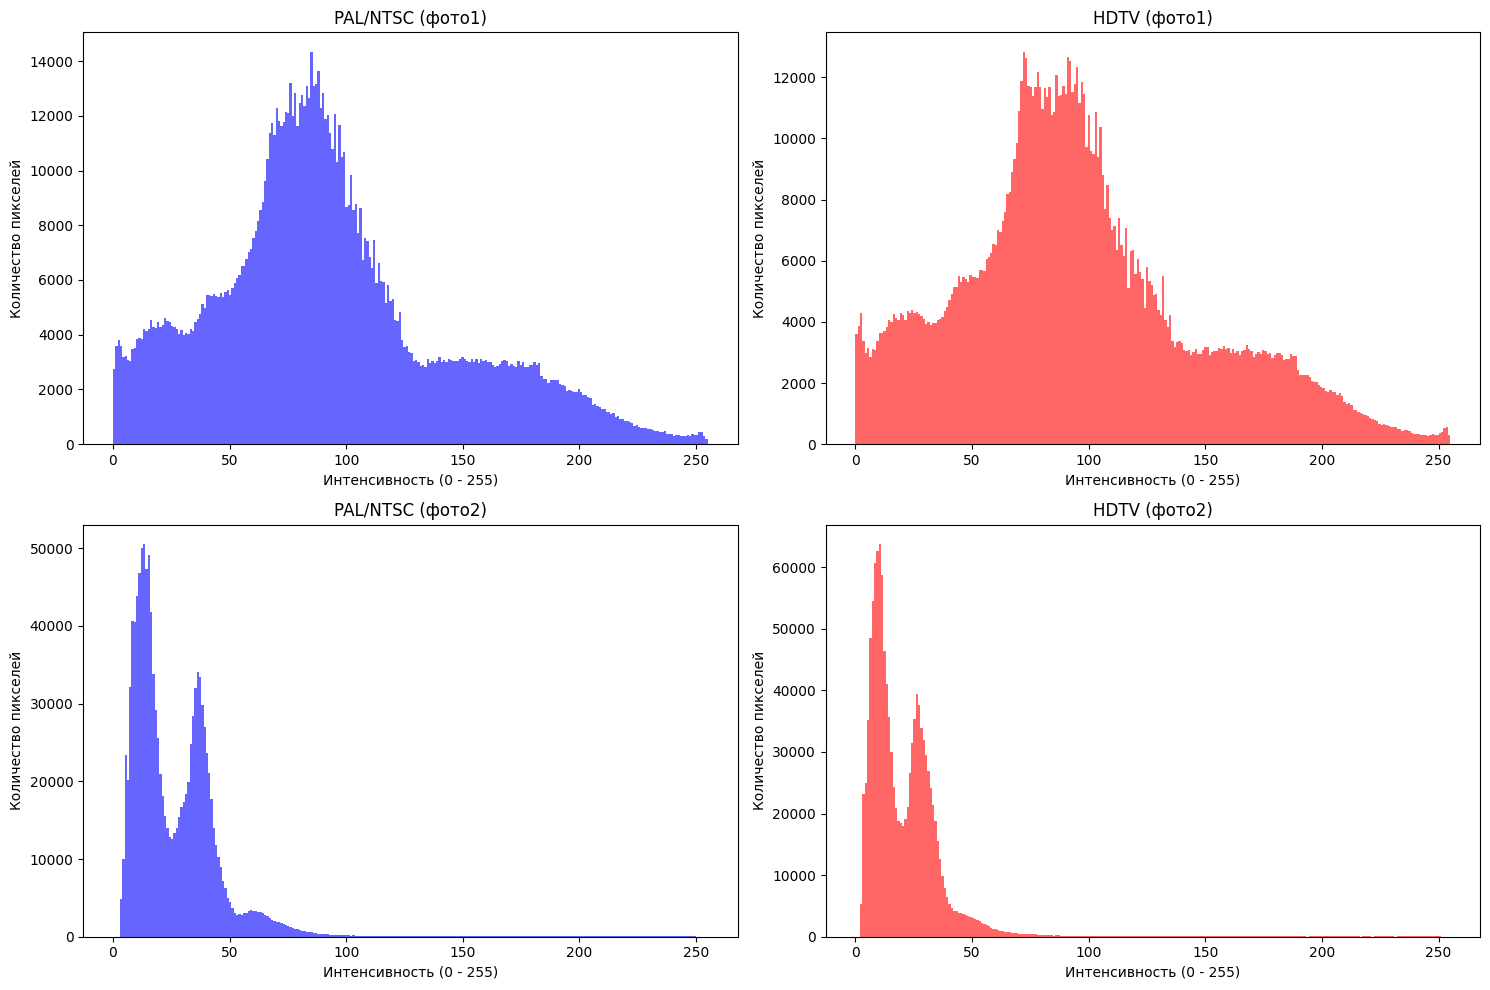

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

axes[0].hist(gray1_1.ravel(), bins=256, range=(0, 255), color="blue", alpha=0.6)
axes[0].set_title("PAL/NTSC (фото1)")
axes[0].set_xlabel("Интенсивность (0 - 255)")
axes[0].set_ylabel("Количество пикселей")

axes[1].hist(gray2_1.ravel(), bins=256, range=(0, 255), color="red", alpha=0.6)
axes[1].set_title("HDTV (фото1)")
axes[1].set_xlabel("Интенсивность (0 - 255)")
axes[1].set_ylabel("Количество пикселей")

axes[2].hist(gray1_2.ravel(), bins=256, range=(0, 255), color="blue", alpha=0.6)
axes[2].set_title("PAL/NTSC (фото2)")
axes[2].set_xlabel("Интенсивность (0 - 255)")
axes[2].set_ylabel("Количество пикселей")

axes[3].hist(gray2_2.ravel(), bins=256, range=(0, 255), color="red", alpha=0.6)
axes[3].set_title("HDTV (фото2)")
axes[3].set_xlabel("Интенсивность (0 - 255)")
axes[3].set_ylabel("Количество пикселей")

plt.tight_layout()
plt.show()

### Сравнительная

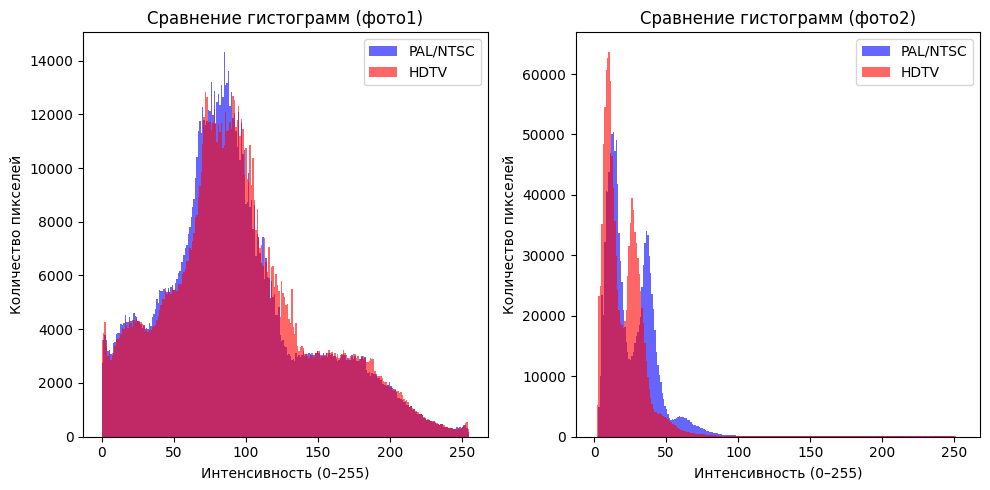

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(gray1_1.ravel(), bins=256, range=(0,255), color="blue", alpha=0.6, label="PAL/NTSC")
axes[0].hist(gray2_1.ravel(), bins=256, range=(0,255), color="red", alpha=0.6, label="HDTV")
axes[0].legend()
axes[0].set_title("Сравнение гистограмм (фото1)")
axes[0].set_xlabel("Интенсивность (0–255)")
axes[0].set_ylabel("Количество пикселей")

axes[1].hist(gray1_2.ravel(), bins=256, range=(0,255), color="blue", alpha=0.6, label="PAL/NTSC")
axes[1].hist(gray2_2.ravel(), bins=256, range=(0,255), color="red", alpha=0.6, label="HDTV")
axes[1].legend()
axes[1].set_title("Сравнение гистограмм (фото2)")
axes[1].set_xlabel("Интенсивность (0–255)")
axes[1].set_ylabel("Количество пикселей")

plt.tight_layout()
plt.show()

### Разность

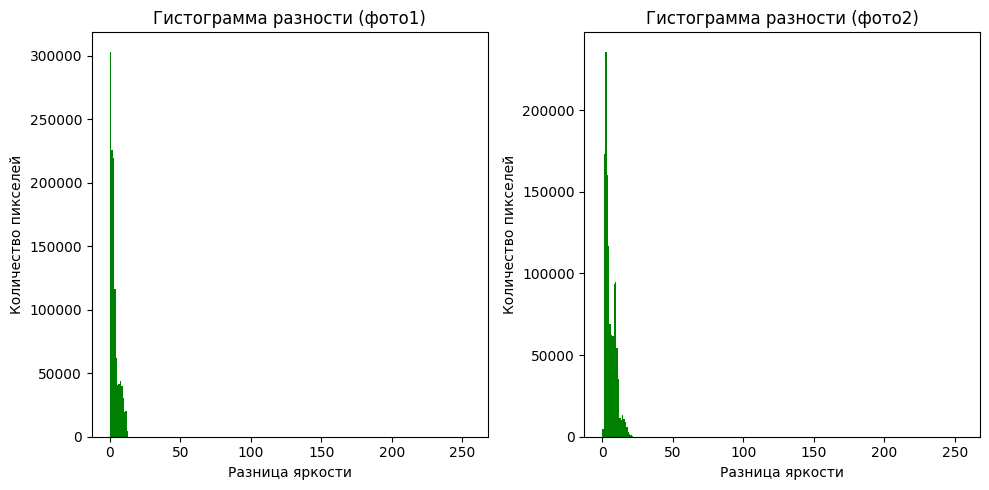

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(diff1.ravel(), bins=256, range=(0,255), color="green")
axes[0].set_title("Гистограмма разности (фото1)")
axes[0].set_xlabel("Разница яркости")
axes[0].set_ylabel("Количество пикселей")

axes[1].hist(diff2.ravel(), bins=256, range=(0,255), color="green")
axes[1].set_title("Гистограмма разности (фото2)")
axes[1].set_xlabel("Разница яркости")
axes[1].set_ylabel("Количество пикселей")

plt.tight_layout()
plt.show()

## Сохранение изображений

In [121]:
Image.fromarray(gray1_1_uint8).save("image1/gray_pal.png")
Image.fromarray(gray2_1_uint8).save("image1/gray_hdtv.png")
Image.fromarray(diff1).save("image1/diff.png")

Image.fromarray(gray1_2_uint8).save("image2/gray_pal.png")
Image.fromarray(gray2_2_uint8).save("image2/gray_hdtv.png")
Image.fromarray(diff2).save("image2/diff.png")